In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [4]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df[['Drug']].values
print(X[0:5])
print(y[0:5])

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]
[['drugY']
 ['drugC']
 ['drugC']
 ['drugX']
 ['drugY']]


In [5]:
from sklearn import preprocessing

#F/M to 0/1
sex_lable_encoder = preprocessing.LabelEncoder()
sex_lable_encoder.fit(['F','M'])
X[:,1] = sex_lable_encoder.transform(X[:,1])

bp_lable_encoder = preprocessing.LabelEncoder()
bp_lable_encoder.fit(['LOW','NORMAL','HIGH'])
X[:,2] = bp_lable_encoder.transform(X[:,2])

chl_lable_encoder = preprocessing.LabelEncoder()
chl_lable_encoder.fit(['NORMAL','HIGH'])
X[:,3] = chl_lable_encoder.transform(X[:,3])

print(X[0:5])

[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]


In [6]:
#test/train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [7]:
#Decision Tree
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [8]:
#Prediction
predTree = drugTree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

['drugX' 'drugB' 'drugC' 'drugY' 'drugY']
[['drugX']
 ['drugB']
 ['drugC']
 ['drugY']
 ['drugY']]


In [9]:
#Evaluation
from sklearn import metrics
print("DecisionTree's Accuracy:", metrics.accuracy_score(y_test, predTree))


DecisionTree's Accuracy: 1.0


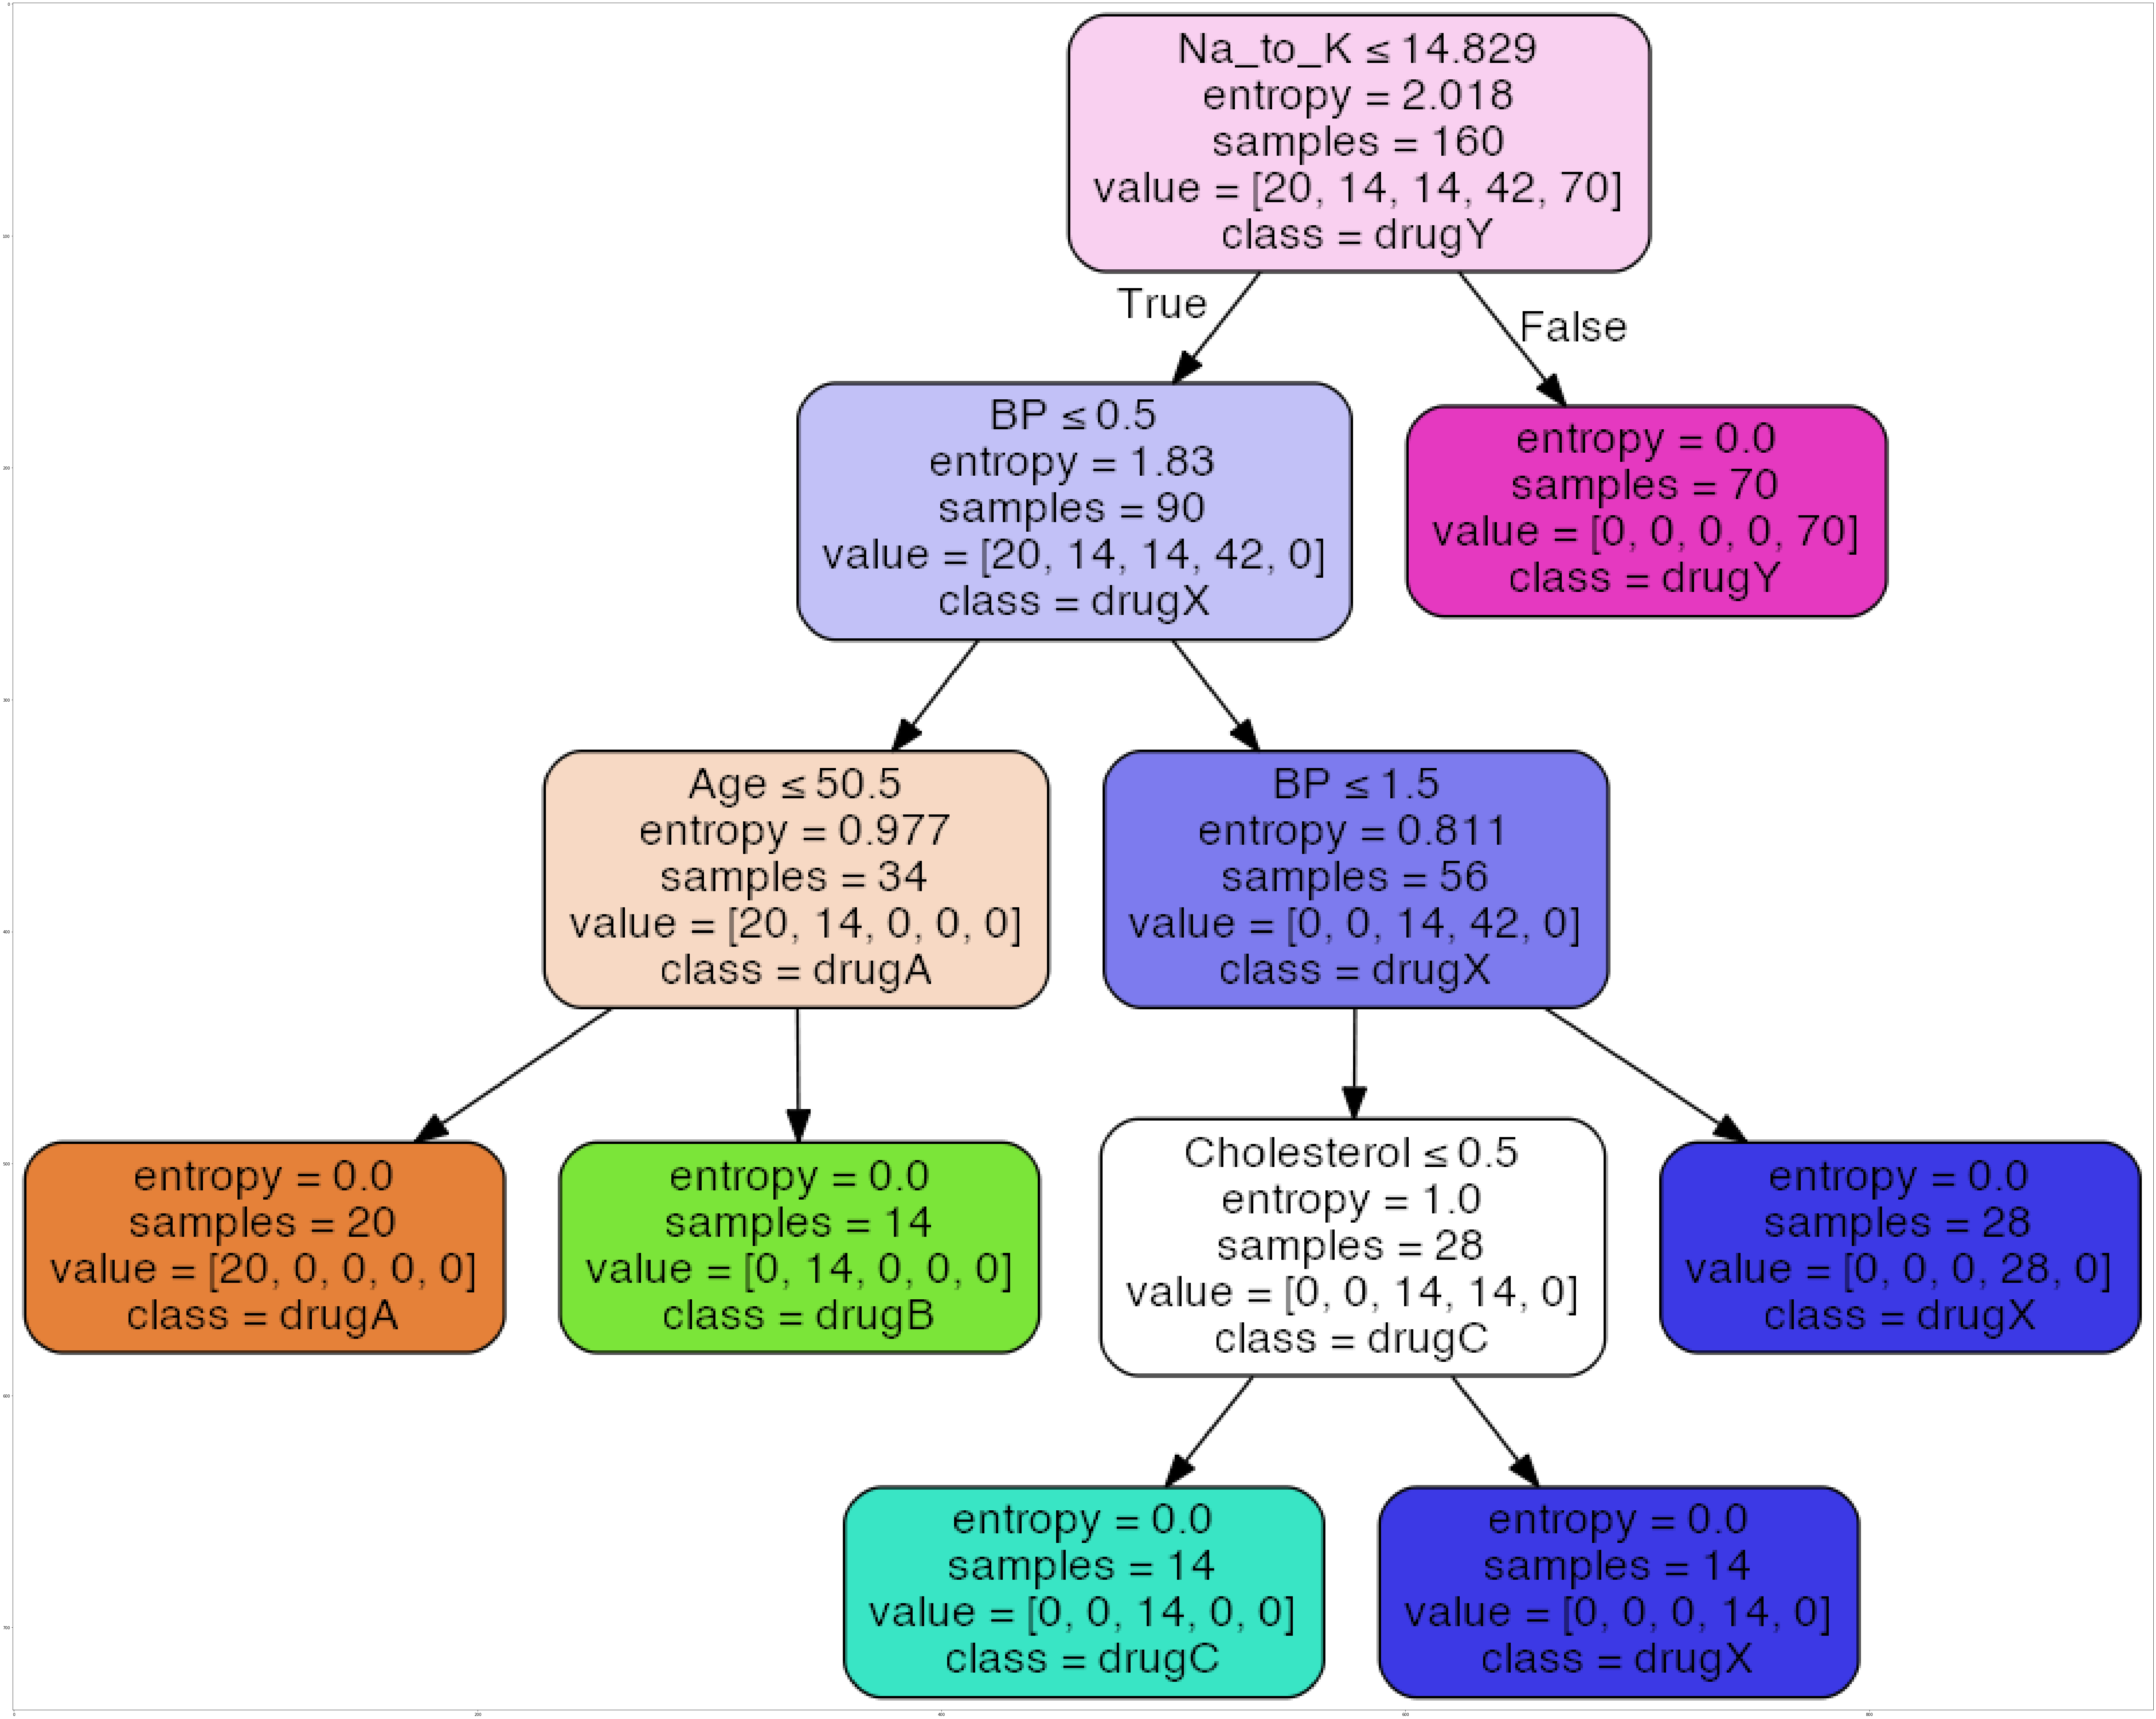

In [12]:
#Visualization
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Amirh.Dallalan\\miniconda3\\Library\\bin\\graphviz'

dot = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
output = tree.export_graphviz(drugTree, out_file=dot, feature_names=featureNames, class_names=np.unique(y_train), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')